# Latest Smartphone Dataset March 2024

### About Dataset
This dataset is scrapped from [www.smartprix.com](www.smartprix.com) using selenium and beautiful Soup Library , this dataset contains 10 columns
The columns contains
* Id
* Model Name
* Specification
* Display
* RAM
* Proccessor
* Camera Information
* Rating
* Price
* Battery

### Import libraries

In [724]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

from sklearn import metrics 

### Load dataset

In [725]:
df = pd.read_csv('smartphones.csv')

### Data Inspection

In [726]:
df.head()

,Unnamed: 0,Model,Price,Rating,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
0,0,iQOO Z9 5G,"₹19,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7200, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 44W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v14
1,1,Nothing Phone 2a,"₹23,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7200 Pro, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,Android v14,No FM Radio
2,2,Vivo V30 Pro 5G,"₹41,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Memory Card Not Supported,Android v14
3,3,Vivo V30 5G,"₹33,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Memory Card Supported,Android v14
4,4,Realme 12 Plus 5G,"₹19,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 2 TB",Android v14


In [727]:
df.tail()

,Unnamed: 0,Model,Price,Rating,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
1015,1015,GFive Z9 New,₹664,NaN,Dual Sim,No Wifi,1.2 MHz Processor,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 320 x 480 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 16 GB"
1016,1016,itel Ace 2 Heera,₹854,NaN,Dual Sim,"Single Core, 208 MHz Processor","32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 120 x 240 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth
1017,1017,Karbonn ‎KX11I,₹899,NaN,Dual Sim,"32 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Symbian v9.3,Bluetooth
1018,1018,MTR Fold Z,"₹1,600",NaN,Dual Sim,256 MHz Processor,"32 MB RAM, 32 MB inbuilt",2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,Memory Card Supported,No FM Radio
1019,1019,Tryto Neo,₹680,NaN,Dual Sim,256 MHz Processor,"32 MB RAM, 32 MB inbuilt",1100 mAh Battery,"1.8 inches, 120 x 240 px Display",0.3 MP Rear Camera,Memory Card Supported,No FM Radio


In [728]:
df.sample(10)

,Unnamed: 0,Model,Price,Rating,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
313,313,Lava Blaze 2 5G,"₹9,999",72.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6020, Octa Core, 2.2 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.5 inches, 720 x 1600 px, 90 Hz Display with ...",50 MP + 0.08 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v13
380,380,Nothing Phone 1 (8GB RAM + 256GB),"₹32,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 256 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,No FM Radio
409,409,Apple iPhone 13 Pro Max (1TB),"₹1,79,900",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 1 TB inbuilt",4352 mAh Battery with Fast Charging,"6.7 inches, 1284 x 2778 px, 120 Hz Display wit...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
661,661,Realme 8,"₹11,999",78.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G95, Octa Core, 2 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 30W Fast Charging,"6.4 inches, 1080 x 2400 px Display with Punch ...",64 MP Quad Rear & 16 MP Front Camera,"Memory Card Supported, upto 256 GB",Android v11
977,977,Lenovo K8 Plus,"₹7,290",64.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio P25, Octa Core, 2.5 GHz Processor","3 GB RAM, 32 GB inbuilt",4000 mAh Battery,"5.2 inches, 1080 x 1920 px Display",13 MP + 5 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 128 GB",Android v7.1.1 (Nougat)
185,185,Oppo A78,"₹15,499",78.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 700 5G, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.56 inches, 720 x 1612 px, 90 Hz Display with...",50 MP + 2 MP Dual Rear & 8 MP Front Camera,Memory Card Supported,Android v12
202,202,Infinix Hot 30 5G (8GB RAM + 128GB),"₹12,980",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 6020, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",6000 mAh Battery with 18W Fast Charging,"6.78 inches, 1080 x 2460 px, 120 Hz Display wi...",50 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v13
122,122,OPPO A59 5G,"₹13,999",71.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6020, Octa Core, 2.2 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.56 inches, 720 x 1612 px, 90 Hz Display with...",13 MP + 2 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v13
54,54,Motorola Edge 40 Neo (12GB RAM + 256GB),"₹24,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7030, Octa Core, 2.5 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 68W Fast Charging,"6.55 inches, 1080 x 2400 px, 144 Hz Display wi...",50 MP + 13 MP Dual Rear & 32 MP Front Camera,Android v13,No FM Radio
365,365,Apple iPhone 12 Mini,"₹59,900",74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio


In [729]:
df.duplicated().sum()

0

No duplicates. That's good

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1020 non-null   int64  
 1   Model            1020 non-null   object 
 2   Price            1020 non-null   object 
 3   Rating           443 non-null    float64
 4   Specification    1020 non-null   object 
 5   Processor        1020 non-null   object 
 6   RAM              1020 non-null   object 
 7   Battery          1020 non-null   object 
 8   Display          1020 non-null   object 
 9   Camera           1020 non-null   object 
 10  Memory           1003 non-null   object 
 11  OperatingSystem  976 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 95.8+ KB


### Data Cleaning

##### Drop irrelevant columns

In [731]:
df.drop(columns=['Unnamed: 0', 'Model', 'Rating', 'Memory'], inplace=True)

In [732]:
df.head()

,Price,Specification,Processor,RAM,Battery,Display,Camera,OperatingSystem
0,"₹19,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7200, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 44W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,Android v14
1,"₹23,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7200 Pro, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,No FM Radio
2,"₹41,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Android v14
3,"₹33,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Android v14
4,"₹19,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14


##### Price cleaning
- Convert price to naira value

In [733]:
# Remove unnecessary string elements
df['Price'] = df['Price'].str.replace('₹', '')
df['Price'] = df['Price'].str.replace(',', '')

In [734]:
# Convert price to float data type
df['Price'] = df['Price'].astype(float)

In [735]:
df['Price']

0       19999.0
1       23999.0
2       41999.0
3       33999.0
4       19999.0
         ...   
1015      664.0
1016      854.0
1017      899.0
1018     1600.0
1019      680.0
Name: Price, Length: 1020, dtype: float64

In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            1020 non-null   float64
 1   Specification    1020 non-null   object 
 2   Processor        1020 non-null   object 
 3   RAM              1020 non-null   object 
 4   Battery          1020 non-null   object 
 5   Display          1020 non-null   object 
 6   Camera           1020 non-null   object 
 7   OperatingSystem  976 non-null    object 
dtypes: float64(1), object(7)
memory usage: 63.9+ KB


In [737]:
# Convert price to from Indian rupees to naira
df['Price'] = df['Price'].apply(lambda x: x*15.64)
df['Price']

0       312784.36
1       375344.36
2       656864.36
3       531744.36
4       312784.36
          ...    
1015     10384.96
1016     13356.56
1017     14060.36
1018     25024.00
1019     10635.20
Name: Price, Length: 1020, dtype: float64

##### RAM Cleaning

In [738]:
df['RAM'] = df['RAM'].str.split(',')

In [739]:
# Drop the columns
df.drop(df[df['RAM'].apply(len) == 1].index, inplace=True)

In [740]:
# Check
df[df['RAM'].apply(len) == 1].shape

(0, 8)

Separate RAM data into RAM and ROM columns

In [741]:
df['ROM'] = df['RAM'].apply(lambda x:x[1])

In [742]:
df["RAM"] = df['RAM'].apply(lambda x:x[0])

In [743]:
# df.drop(df[df['RAM'].str.contains('Single')].index, inplace=True)
df = df[df['RAM'].str.contains('GB') & df['ROM'].str.contains('GB')]

Convert RAM and ROM data to integer values

In [744]:
df['RAM'] = df["RAM"].str.replace('GB RAM', '')
df['RAM'] = df["RAM"].str.strip()

In [745]:
df['ROM'] = df["ROM"].str.replace('GB inbuilt', '')
df['ROM'] = df["ROM"].str.strip()

In [746]:
df['RAM'] = df["RAM"].astype(int)
df['ROM'] = df["ROM"].astype(int)

##### Battery Cleaning

In [747]:
df['Battery'] = df['Battery'].str.split(' ')

In [748]:
# Get the battery capacity
df['Battery'] = df["Battery"].apply(lambda x:x[0])

In [749]:
df = df[df['Battery'].str.contains('mAh')]

Convert battery to integer value

In [750]:
df['Battery'] = df['Battery'].str.replace('mAh', '')

In [751]:
df['Battery'] = df['Battery'].astype(int)

In [752]:
df.head()

,Price,Specification,Processor,RAM,Battery,Display,Camera,OperatingSystem,ROM
0,312784.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7200, Octa Core, 2.8 GHz Processor",8,5000,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,Android v14,128
1,375344.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7200 Pro, Octa Core, 2.8 GHz Processor",8,5000,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,No FM Radio,128
2,656864.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 8200, Octa Core, 3.1 GHz Processor",8,5000,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Android v14,256
3,531744.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor",8,5000,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Android v14,128
4,312784.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor",8,5000,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14,128


##### Processor cleaning

In [753]:
df = df[df['Processor'].str.contains('GHz')]

In [754]:
df['Processor'] = df['Processor'].str.split(', ')

In [755]:
# Define a function to extract processor attributes
def extract_processor_info(processor):
    try:
        speed = processor[-1]
    except IndexError:
        speed = 'None'
    
    try:
        core = processor[-2]
    except IndexError:
        core = 'None'
    
    try:
        name = processor[-3]
    except IndexError:
        name = 'None'
    
    return speed, core, name

# Apply the function to each row in the DataFrame
df['Processor Speed'], df['Processor Core'], df['Processor Name'] = zip(*df['Processor'].apply(extract_processor_info))

In [756]:
df['Processor Name'] = df['Processor Name'].str.split(' ')
df['Processor Name'] = df['Processor Name'].apply(lambda x: x[0])

In [757]:
df

,Price,Specification,Processor,RAM,Battery,Display,Camera,OperatingSystem,ROM,Processor Speed,Processor Core,Processor Name
0,312784.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","[Dimensity 7200, Octa Core, 2.8 GHz Processor]",8,5000,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,Android v14,128,2.8 GHz Processor,Octa Core,Dimensity
1,375344.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","[Dimensity 7200 Pro, Octa Core, 2.8 GHz Proces...",8,5000,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,No FM Radio,128,2.8 GHz Processor,Octa Core,Dimensity
2,656864.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","[Dimensity 8200, Octa Core, 3.1 GHz Processor]",8,5000,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Android v14,256,3.1 GHz Processor,Octa Core,Dimensity
3,531744.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","[Snapdragon 7 Gen3, Octa Core, 2.63 GHz Proces...",8,5000,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Android v14,128,2.63 GHz Processor,Octa Core,Snapdragon
4,312784.36,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","[Dimensity 7050, Octa Core, 2.6 GHz Processor]",8,5000,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14,128,2.6 GHz Processor,Octa Core,Dimensity
...,...,...,...,...,...,...,...,...,...,...,...,...
983,117143.60,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","[Exynos 3475, Quad Core, 1.3 GHz Processor]",2,2600,"5 inches, 720 x 1280 px Display",8 MP Rear & 5 MP Front Camera,Android v6.0 (Marshmallow),16,1.3 GHz Processor,Quad Core,Exynos
984,70364.36,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","[Quad Core, 1.3 GHz Processor]",3,2500,"5 inches, 720 x 1280 px Display",13 MP Rear & 8 MP Front Camera,Android v6.0 (Marshmallow),16,1.3 GHz Processor,Quad Core,None
985,70974.32,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","[Snapdragon 615, Octa Core, 1.5 GHz Processor]",3,3500,"5.5 inches, 1080 x 1920 px Display",13 MP + 2 MP Dual Rear & 5 MP Front Camera,Android v5.1.1 (Lollipop),32,1.5 GHz Processor,Octa Core,Snapdragon
986,109323.60,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","[Snapdragon 410, Quad Core, 1.4 GHz Processor]",2,2470,"5 inches, 720 x 1280 px Display",13 MP Rear & 5 MP Front Camera,Android v5.1.1 (Lollipop),16,1.4 GHz Processor,Quad Core,Snapdragon


Convert processor speed data into float

In [758]:
df['Processor Speed'] = df['Processor Speed'].str.replace('GHz Processor', '')
df['Processor Speed'] = df['Processor Speed'].str.strip()

In [759]:
df['Processor Speed'] = df['Processor Speed'].astype(float)

In [760]:
df.drop(columns=['Processor'], inplace=True)

##### Display cleaning

In [761]:
df = df[df['Display'].str.contains(', ')]

In [762]:
df['Display'] = df['Display'].str.split(', ')

C:\Users\USER\AppData\Local\Temp\ipykernel_11400\2363930517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Display'] = df['Display'].str.split(', ')


In [763]:
df['Screen Size'] = df['Display'].apply(lambda x:x[0])
df['Screen Resolution'] = df['Display'].apply(lambda x:x[1])

C:\Users\USER\AppData\Local\Temp\ipykernel_11400\4204054865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen Size'] = df['Display'].apply(lambda x:x[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_11400\4204054865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen Resolution'] = df['Display'].apply(lambda x:x[1])


In [764]:
df.drop(columns=['Display'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11400\3716159109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Display'], inplace=True)


Convert Screen Size column to integer values

In [765]:
df['Screen Size'] = df['Screen Size'].str.replace('inches', '')
df['Screen Size'] = df['Screen Size'].str.strip()

C:\Users\USER\AppData\Local\Temp\ipykernel_11400\706654320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen Size'] = df['Screen Size'].str.replace('inches', '')
C:\Users\USER\AppData\Local\Temp\ipykernel_11400\706654320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen Size'] = df['Screen Size'].str.strip()


In [766]:
df['Screen Size'] = df['Screen Size'].astype(float)

C:\Users\USER\AppData\Local\Temp\ipykernel_11400\3891370351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen Size'] = df['Screen Size'].astype(float)


Convert Screen Resolution column to integer values

In [767]:
df['Screen Resolution'] = df['Screen Resolution'].str.split('px')

C:\Users\USER\AppData\Local\Temp\ipykernel_11400\277031670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen Resolution'] = df['Screen Resolution'].str.split('px')


In [768]:
df['Screen Resolution'] = df['Screen Resolution'].apply(lambda x:x[0])

C:\Users\USER\AppData\Local\Temp\ipykernel_11400\3599751508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen Resolution'] = df['Screen Resolution'].apply(lambda x:x[0])


In [769]:
# Split screen resolution into two parts: x and y
df['Screen Resolution'] = df['Screen Resolution'].str.split('x')

C:\Users\USER\AppData\Local\Temp\ipykernel_11400\3507461182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen Resolution'] = df['Screen Resolution'].str.split('x')


In [770]:
df.drop(df[df['Screen Resolution'].apply(len) == 1].index, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11400\443525580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Screen Resolution'].apply(len) == 1].index, inplace=True)


In [771]:
df['Screen Res X'] = df['Screen Resolution'].apply(lambda x:x[0])
df['Screen Res Y'] = df['Screen Resolution'].apply(lambda x:x[1])

C:\Users\USER\AppData\Local\Temp\ipykernel_11400\3017340725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen Res X'] = df['Screen Resolution'].apply(lambda x:x[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_11400\3017340725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen Res Y'] = df['Screen Resolution'].apply(lambda x:x[1])


In [772]:
# Convert column values to integer
df['Screen Res X'] = df['Screen Res X'].astype(int)
df['Screen Res Y'] = df['Screen Res Y'].astype(int)

C:\Users\USER\AppData\Local\Temp\ipykernel_11400\3741414082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen Res X'] = df['Screen Res X'].astype(int)
C:\Users\USER\AppData\Local\Temp\ipykernel_11400\3741414082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen Res Y'] = df['Screen Res Y'].astype(int)


In [773]:
df.drop(columns=['Screen Resolution'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11400\3428858680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Screen Resolution'], inplace=True)


##### Operating System Cleaning

In [774]:
df = df[df['OperatingSystem'].str.contains('Android') | df['OperatingSystem'].str.contains('iOS')]

In [775]:
df['OperatingSystem'] = df['OperatingSystem'].str.split(' ')

In [776]:
df.drop(df[df['OperatingSystem'].apply(len) == 1].index, inplace=True)

In [777]:
df['OS'] = df['OperatingSystem'].apply(lambda x:x[0])
df['OS Version'] = df['OperatingSystem'].apply(lambda x:x[1])

In [778]:
df.drop(columns=['OperatingSystem'], inplace=True)

Converting OS version data into integer values

In [779]:
df['OS Version'] = df['OS Version'].str.replace('v', '')

In [780]:
df['OS Version'] = df['OS Version'].str.split('.')

In [781]:
df['OS Version'] = df["OS Version"].apply(lambda x:x[0])

In [782]:
# Convert to integer
df['OS Version'] = df["OS Version"].astype(int)

##### Camera cleaning

In [783]:
df = df[df['Camera'].str.contains('MP')]

Split into front and back camera

In [784]:
df['Camera'] = df['Camera'].str.split('&')

In [785]:
df['Rear Camera'] = df['Camera'].apply(lambda x:x[0])
df['Front Camera'] = df['Camera'].apply(lambda x:x[1])

In [786]:
df.drop(columns=['Camera'], inplace=True)

Front camera

In [787]:
df['Front Camera'] = df['Front Camera'].str.strip()
df['Front Camera'] = df['Front Camera'].str.split(' ')
df['Front Camera'] = df['Front Camera'].apply(lambda x:x[0])

In [788]:
df['Front Camera'] = df['Front Camera'].str.replace('MP', '')
df['Front Camera'] = df['Front Camera'].str.strip()

In [789]:
df["Front Camera"] = df['Front Camera'].astype(float)

Rear Camera

In [790]:
df['Rear Camera'] = df["Rear Camera"].str.split('+')

In [791]:
rear_camera_last = df['Rear Camera'].apply(lambda x:x[-1]).str.split('MP')
rear_camera_last = rear_camera_last.apply(lambda x:x[0]).str.strip()
# rear_camera_last = rear_camera_last.astype(int)

rear_camera_last

0       2
2      50
3      50
4       2
5       2
       ..
983     8
984    13
985     2
986    13
999     8
Name: Rear Camera, Length: 697, dtype: object

In [792]:
import re
def sum_rear_camera_mp(lst):
    mp_num_list = []
    mp_sum = 0
    
    # Regular expression pattern to match numbers
    pattern = r'\b\d+\b'
    
    for item in lst:
        numbers = re.findall(pattern, item)
        if numbers:
            mp_num_list.append(numbers[0])
            mp_sum = sum(map(int, mp_num_list))

    return mp_sum
        
df['Rear Camera'] = df['Rear Camera'].apply(lambda x: sum_rear_camera_mp(x))

In [793]:
df['Rear Camera'] = df['Rear Camera'].astype(float)

##### Specifications cleaning

In [794]:
df['Sim Type'] = df['Specification'].str.split(', ')
df['Sim Type'] = df['Sim Type'].apply(lambda x:x[0])

In [795]:
df.drop(columns=['Specification'], inplace=True)

##### Final touches

Rename columns for better understanding of the values

In [796]:
df.rename(columns={
    'Price': 'Price (in Naira)',
    'Processor Speed': 'Processor Speed (GHz)',
    'RAM': 'RAM (GB)',
    'ROM': 'ROM (GB)',
    'Battery': 'Battery (mAh)',
    'Screen Size': 'Screen Size (inches)',
    'Screen Res X': 'Screen Res X (px)',
    'Screen Res Y': 'Screen Res Y (px)',
    'Rear Camera': 'Rear Camera (MP)',
    'Front Camera': 'Front Camera (MP)',
}, inplace=True)

In [797]:
df

,Price (in Naira),RAM (GB),Battery (mAh),ROM (GB),Processor Speed (GHz),Processor Core,Processor Name,Screen Size (inches),Screen Res X (px),Screen Res Y (px),OS,OS Version,Rear Camera (MP),Front Camera (MP),Sim Type
0,312784.36,8,5000,128,2.80,Octa Core,Dimensity,6.67,1080,2400,Android,14,52.0,16.0,Dual Sim
2,656864.36,8,5000,256,3.10,Octa Core,Dimensity,6.78,1260,2800,Android,14,150.0,50.0,Dual Sim
3,531744.36,8,5000,128,2.63,Octa Core,Snapdragon,6.78,1260,2800,Android,14,100.0,50.0,Dual Sim
4,312784.36,8,5000,128,2.60,Octa Core,Dimensity,6.67,1080,2400,Android,14,60.0,16.0,Dual Sim
5,375344.36,8,5000,128,2.60,Octa Core,Dimensity,6.70,1080,2412,Android,14,74.0,32.0,Dual Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,117143.60,2,2600,16,1.30,Quad Core,Exynos,5.00,720,1280,Android,6,8.0,5.0,Dual Sim
984,70364.36,3,2500,16,1.30,Quad Core,None,5.00,720,1280,Android,6,13.0,8.0,Dual Sim
985,70974.32,3,3500,32,1.50,Octa Core,Snapdragon,5.50,1080,1920,Android,5,15.0,5.0,Dual Sim
986,109323.60,2,2470,16,1.40,Quad Core,Snapdragon,5.00,720,1280,Android,5,13.0,5.0,Dual Sim


### Data Visualization

##### Correlation Heatmap

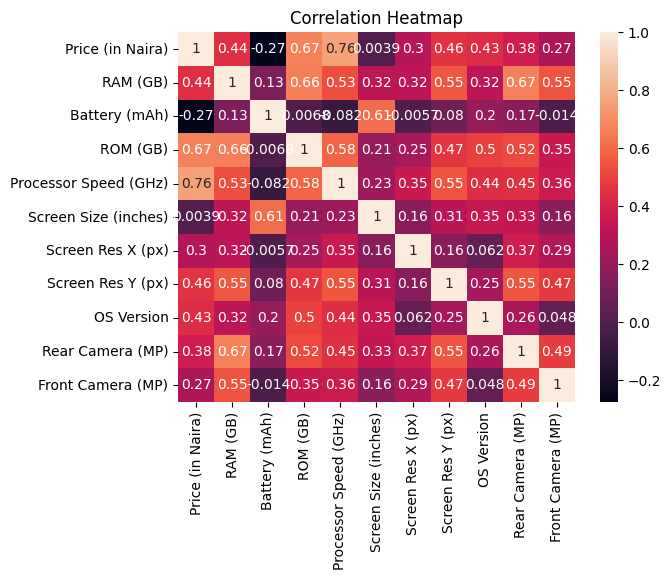

In [798]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

Get number of android and iOS devices and plot on a pie chart

In [799]:
devices = df['OS'].value_counts().reset_index()
devices

,OS,count
0,Android,668
1,iOS,29


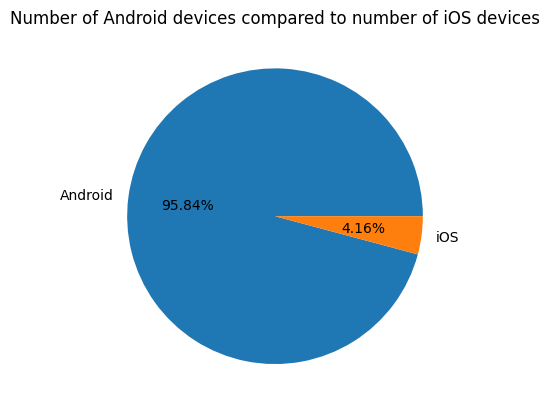

In [800]:
plt.pie(x=devices['count'], labels=devices['OS'], autopct='%.2f%%')
plt.title('Number of Android devices compared to number of iOS devices')
plt.show()

### ML Model Building

In [801]:
X = df.drop(columns=['Price (in Naira)'])
y = df['Price (in Naira)']

In [802]:
X

,RAM (GB),Battery (mAh),ROM (GB),Processor Speed (GHz),Processor Core,Processor Name,Screen Size (inches),Screen Res X (px),Screen Res Y (px),OS,OS Version,Rear Camera (MP),Front Camera (MP),Sim Type
0,8,5000,128,2.80,Octa Core,Dimensity,6.67,1080,2400,Android,14,52.0,16.0,Dual Sim
2,8,5000,256,3.10,Octa Core,Dimensity,6.78,1260,2800,Android,14,150.0,50.0,Dual Sim
3,8,5000,128,2.63,Octa Core,Snapdragon,6.78,1260,2800,Android,14,100.0,50.0,Dual Sim
4,8,5000,128,2.60,Octa Core,Dimensity,6.67,1080,2400,Android,14,60.0,16.0,Dual Sim
5,8,5000,128,2.60,Octa Core,Dimensity,6.70,1080,2412,Android,14,74.0,32.0,Dual Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,2,2600,16,1.30,Quad Core,Exynos,5.00,720,1280,Android,6,8.0,5.0,Dual Sim
984,3,2500,16,1.30,Quad Core,None,5.00,720,1280,Android,6,13.0,8.0,Dual Sim
985,3,3500,32,1.50,Octa Core,Snapdragon,5.50,1080,1920,Android,5,15.0,5.0,Dual Sim
986,2,2470,16,1.40,Quad Core,Snapdragon,5.00,720,1280,Android,5,13.0,5.0,Dual Sim


Convert categorical data into numerical values using label encoding <br/>
The columns in play here are **OS and Sim Type**

In [803]:
os_type = pd.get_dummies(X['OS'], dtype='int')
sim_type = pd.get_dummies(X['Sim Type'], dtype='int')
processor_name = pd.get_dummies(X['Processor Name'], dtype='int')
processor_core = pd.get_dummies(X['Processor Core'], dtype='int')

In [804]:
os_type

,Android,iOS
0,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
983,1,0
984,1,0
985,1,0
986,1,0


In [805]:
sim_type

,Dual Sim,Single Sim
0,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
983,1,0
984,1,0
985,1,0
986,1,0


In [806]:
processor_name

,,A13,Apple,Bionic,Dimensity,Exynos,Helio,Kirin,None,Qualcomm,SC9863A,Snapdragon,Spreadtrum,Tensor,Tiger,Unisoc
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
984,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
985,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
986,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [807]:
processor_core

,Dual Core,Hexa Core,None,Octa Core,Quad Core
0,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
...,...,...,...,...,...
983,0,0,0,0,1
984,0,0,0,0,1
985,0,0,0,1,0
986,0,0,0,0,1


In [808]:
X = pd.concat([X, os_type, sim_type, processor_name, processor_core], axis=1)

In [809]:
X.drop(columns=['OS', 'Sim Type', 'Processor Name', 'Processor Core'], inplace=True)
X

,RAM (GB),Battery (mAh),ROM (GB),Processor Speed (GHz),Screen Size (inches),Screen Res X (px),Screen Res Y (px),OS Version,Rear Camera (MP),Front Camera (MP),...,Snapdragon,Spreadtrum,Tensor,Tiger,Unisoc,Dual Core,Hexa Core,None,Octa Core,Quad Core
0,8,5000,128,2.80,6.67,1080,2400,14,52.0,16.0,...,0,0,0,0,0,0,0,0,1,0
2,8,5000,256,3.10,6.78,1260,2800,14,150.0,50.0,...,0,0,0,0,0,0,0,0,1,0
3,8,5000,128,2.63,6.78,1260,2800,14,100.0,50.0,...,1,0,0,0,0,0,0,0,1,0
4,8,5000,128,2.60,6.67,1080,2400,14,60.0,16.0,...,0,0,0,0,0,0,0,0,1,0
5,8,5000,128,2.60,6.70,1080,2412,14,74.0,32.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,2,2600,16,1.30,5.00,720,1280,6,8.0,5.0,...,0,0,0,0,0,0,0,0,0,1
984,3,2500,16,1.30,5.00,720,1280,6,13.0,8.0,...,0,0,0,0,0,0,0,0,0,1
985,3,3500,32,1.50,5.50,1080,1920,5,15.0,5.0,...,1,0,0,0,0,0,0,0,1,0
986,2,2470,16,1.40,5.00,720,1280,5,13.0,5.0,...,1,0,0,0,0,0,0,0,0,1


##### Model Training

In [810]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Using linear regression

In [811]:
lreg_model = LinearRegression()
lreg_model.fit(X_train, y_train)

LinearRegression()

In [812]:
lreg_pred = lreg_model.predict(X_test)

In [813]:
y_test = np.array(y_test)

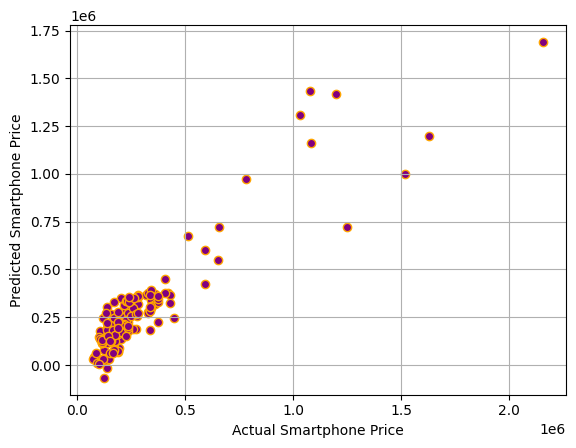

In [814]:
plt.scatter(y_test, lreg_pred, edgecolors='orange', color='purple')
plt.xlabel('Actual Smartphone Price')
plt.ylabel('Predicted Smartphone Price')
plt.grid()
plt.show()

Accuracy score check

In [815]:
rmse = metrics.mean_squared_error(y_test, lreg_pred)
r2 = metrics.r2_score(y_test, lreg_pred)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2 ) * (N - 1)) / (N - P - 1)

print(f'RMSE: {rmse:.3f}')
print(f'R2 Score: {r2:.3f}')
print(f'Adjusted R2 Score: {r2_adjusted:.3f}')

RMSE: 14271342483.141
R2 Score: 0.843
Adjusted R2 Score: 0.791


Using ridge model

In [816]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.5)

In [817]:
ridge_pred = ridge_model.predict(X_test)

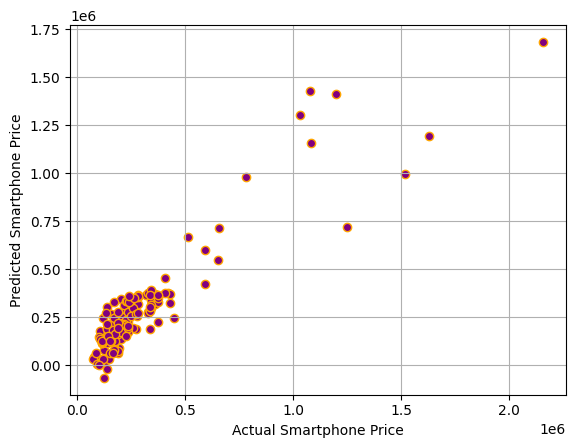

In [818]:
plt.scatter(y_test, ridge_pred, edgecolors='orange', color='purple')
plt.xlabel('Actual Smartphone Price')
plt.ylabel('Predicted Smartphone Price')
plt.grid()
plt.show()

In [819]:
rmse = metrics.mean_squared_error(y_test, lreg_pred)
r2 = metrics.r2_score(y_test, lreg_pred)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2 ) * (N - 1)) / (N - P - 1)

print(f'RMSE: {rmse:.3f}')
print(f'R2 Score: {r2:.3f}')
print(f'Adjusted R2 Score: {r2_adjusted:.3f}')

RMSE: 14271342483.141
R2 Score: 0.843
Adjusted R2 Score: 0.791


### Save model

In [820]:
import pickle

with open('smartphone.pickle', 'wb') as file:
    pickle.dump(lreg_model, file)